# Módulo 5. Entregable

In [40]:
# Importar las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from symbulate import *
from numpy.linalg import inv
import sklearn
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [41]:
# Importar los archivos
df_1 = pd.read_csv("us2022q2a.csv")
df_1

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000,1
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000,2
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000,3
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000,4
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.290000,5.2900,41251.537,6.0,2021,2
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021,3
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021,4
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022,1


In [42]:
df_2 = pd.read_csv("usfirms2022.csv", usecols=['Ticker', 'Name', 'Sector NAICS\nlevel 1'])
df_2

,Ticker,Name,Sector NAICS\nlevel 1
0,FLWS,1 800 Flowers Com Inc,Retail Trade
1,TXG,"10x Genomics, Inc",Manufacturing
2,GOED,1847 Goedeker Inc,Retail Trade
3,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
4,SRCE,1st Source Corp,Finance and Insurance
...,...,...,...
3603,ZUO,"Zuora, Inc",Information
3604,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3605,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3606,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [43]:
# Merge con otra tabla
df = pd.merge(df_1, df_2, left_on='firm', right_on='Ticker')
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Ticker,Name,Sector NAICS\nlevel 1
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.761670,104.0000,452000.000,NaN,2000,1,A,"Agilent Technologies, Inc",Manufacturing
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,4642000.000,45.215607,73.7500,452271.967,6.0,2000,2,A,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,4902000.000,30.003238,48.9375,453014.579,9.0,2000,3,A,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,5265000.000,33.566841,54.7500,456366.381,12.0,2000,4,A,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,5541000.000,18.840347,30.7300,456769.737,3.0,2001,1,A,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,87699.257,5.290000,5.2900,41251.537,6.0,2021,2,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,78686.999,4.240000,4.2400,41251.537,9.0,2021,3,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,70913.334,2.880000,2.8800,41217.537,12.0,2021,4,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,65166.970,2.050000,2.0500,42447.037,3.0,2022,1,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [44]:
# Dividirlo por periodo
df['q'] = pd.PeriodIndex(df['q'], freq="Q")

In [45]:
# Seleccionar la industria de manufactura
df_last = df.loc[(df['Sector NAICS\nlevel 1'] == 'Manufacturing')]
df_last

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Ticker,Name,Sector NAICS\nlevel 1
0,A,2000Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.761670,104.0000,452000.000,NaN,2000,1,A,"Agilent Technologies, Inc",Manufacturing
1,A,2000Q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,4642000.000,45.215607,73.7500,452271.967,6.0,2000,2,A,"Agilent Technologies, Inc",Manufacturing
2,A,2000Q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,4902000.000,30.003238,48.9375,453014.579,9.0,2000,3,A,"Agilent Technologies, Inc",Manufacturing
3,A,2000Q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,5265000.000,33.566841,54.7500,456366.381,12.0,2000,4,A,"Agilent Technologies, Inc",Manufacturing
4,A,2001Q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,5541000.000,18.840347,30.7300,456769.737,3.0,2001,1,A,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021Q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,87699.257,5.290000,5.2900,41251.537,6.0,2021,2,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021Q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,78686.999,4.240000,4.2400,41251.537,9.0,2021,3,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021Q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,70913.334,2.880000,2.8800,41217.537,12.0,2021,4,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022Q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,65166.970,2.050000,2.0500,42447.037,3.0,2022,1,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [46]:
# Establecer firm como index
df_last.set_index('firm', inplace=True)
df_last

,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Ticker,Name,Sector NAICS\nlevel 1
firm,,,,,,,,,,,,,,,,,,,,,
A,2000Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.761670,104.0000,452000.000,NaN,2000,1,A,"Agilent Technologies, Inc",Manufacturing
A,2000Q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,...,4642000.000,45.215607,73.7500,452271.967,6.0,2000,2,A,"Agilent Technologies, Inc",Manufacturing
A,2000Q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,...,4902000.000,30.003238,48.9375,453014.579,9.0,2000,3,A,"Agilent Technologies, Inc",Manufacturing
A,2000Q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,...,5265000.000,33.566841,54.7500,456366.381,12.0,2000,4,A,"Agilent Technologies, Inc",Manufacturing
A,2001Q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,...,5541000.000,18.840347,30.7300,456769.737,3.0,2001,1,A,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYNE,2021Q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,10496.647,...,87699.257,5.290000,5.2900,41251.537,6.0,2021,2,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
ZYNE,2021Q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,...,78686.999,4.240000,4.2400,41251.537,9.0,2021,3,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
ZYNE,2021Q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,...,70913.334,2.880000,2.8800,41217.537,12.0,2021,4,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [47]:
# Eliminar las columnas innecesarias
df_manu = df_last.drop(['Ticker', 'year', 'Sector NAICS\nlevel 1', 'cto'], axis=1)
df_manu

,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,Name
firm,,,,,,,,,,,,,,,,,,
A,2000Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,"Agilent Technologies, Inc"
A,2000Q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,"Agilent Technologies, Inc"
A,2000Q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,"Agilent Technologies, Inc"
A,2000Q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,"Agilent Technologies, Inc"
A,2001Q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,"Agilent Technologies, Inc"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYNE,2021Q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.290000,5.2900,41251.537,6.0,"Zynerba Pharmaceuticals, Inc"
ZYNE,2021Q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,"Zynerba Pharmaceuticals, Inc"
ZYNE,2021Q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,"Zynerba Pharmaceuticals, Inc"


In [48]:
# Obtener los factores
df_manu['Market_Value'] = df_manu['originalprice'] * df_manu['sharesoutstanding']
df_manu['Book_Value'] = df_manu['totalassets'] - df_manu['totalliabilities']
df_manu['Ebit'] = df_manu['revenue'] - df_manu['cogs'] - df_manu['sgae'] - df_manu['otheropexp']
df_manu['OPM'] = df_manu['Ebit'] / df_manu['revenue']

In [49]:
# Calcular nuevas variables

# df_manu['Book_Market_Ratio'] = df_manu['Book_Value'] / df_manu['Market_Value']
# df_manu['Short_Financial_Leverage'] = df_manu["shortdebt"] / df_manu["totalassets"]
df_manu['Long_Financial_Leverage'] = df_manu["longdebt"] / df_manu["totalassets"]
# df_manu['Operating_Profit'] = (df_manu["Ebit"] - df_manu["Ebit"].shift(4))  - 1
# df_manu['Ventas_anual'] = (df_manu["revenue"] - df_manu["revenue"].shift(4)) - 1
df_manu['EPS'] = (df_manu["Ebit"] - df_manu["incometax"] - df_manu["finexp"]) / df_manu["sharesoutstanding"]
df_manu['EPSP'] =  df_manu["EPS"] / df_manu["originalprice"]
df_manu['Size'] = df_manu['Market_Value']

In [50]:
df_manu['Lprice'] = df_manu.groupby(['firm'])['adjprice'].shift(4)
df_manu['r'] = np.log(df_manu['adjprice']) - np.log(df_manu['Lprice'])
df_manu["Return"] = df_manu.groupby(["firm"])["r"].shift(-1)

In [51]:
#Dividir por size
df_manu["Small"] = df_manu.Size <= df_manu.Size.quantile(.33)
df_manu["Medium"] = (df_manu.Size <= df_manu.Size.quantile(.66)) & (df_manu.Size > df_manu.Size.quantile(.33))
df_manu["Small"] = df_manu["Small"].astype(int)
df_manu["Medium"] = df_manu["Medium"].astype(int)

In [52]:
df_manu

,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,OPM,Long_Financial_Leverage,EPS,EPSP,Size,Lprice,r,Return,Small,Medium
firm,,,,,,,,,,,,,,,,,,,,,
A,2000Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.700800e+07,NaN,NaN,NaN,0,0
A,2000Q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,...,0.086117,0.000000,0.274171,0.003718,3.335506e+07,NaN,NaN,NaN,0,0
A,2000Q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,...,0.078652,0.000000,0.280344,0.005729,2.216940e+07,NaN,NaN,NaN,0,0
A,2000Q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,...,0.135824,0.000000,0.646410,0.011807,2.498606e+07,NaN,NaN,-1.219152,0,0
A,2001Q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,...,0.098205,0.000000,0.350286,0.011399,1.403653e+07,63.76167,-1.219152,-0.819441,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYNE,2021Q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,10496.647,...,-inf,0.004770,-0.238356,-0.045058,2.182206e+05,3.37000,0.450906,0.247615,1,0
ZYNE,2021Q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,...,-inf,0.004569,-0.247400,-0.058349,1.749065e+05,3.31000,0.247615,-0.136132,1,0
ZYNE,2021Q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,...,-inf,0.004357,-0.214278,-0.074402,1.187065e+05,3.30000,-0.136132,-0.819027,1,0


In [53]:
# Seleccionar el primer trimestre
df_manu = df_manu.loc[df_manu['q'] == '2022Q1']
df_manu

,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,OPM,Long_Financial_Leverage,EPS,EPSP,Size,Lprice,r,Return,Small,Medium
firm,,,,,,,,,,,,,,,,,,,,,
A,2022Q1,1674000.0,764000.0,5.340000e+05,0.0,-37000.00000,20000.000,36000.0,1.032700e+07,5.173000e+06,...,0.224612,0.264356,1.066264,0.008058,3.971400e+07,126.034506,0.045405,-0.213296,0,0
AA,2022Q1,3293000.0,2181000.0,2.130000e+05,125000.0,-70000.00000,25000.000,210000.0,1.598800e+07,9.731000e+06,...,0.235044,0.108019,2.907180,0.032291,1.669183e+07,32.262641,1.022496,0.217886,0,0
AAOI,2022Q1,52242.0,43217.0,2.326400e+04,0.0,-450.00000,1373.000,0.0,4.467530e+05,2.071760e+05,...,-0.272558,0.202891,-0.567540,-0.155490,1.004049e+05,8.360000,-0.828731,-1.698276,1,0
AAON,2022Q1,182771.0,136707.0,2.305600e+04,-2.0,21.00000,190.000,4782.0,7.174580e+05,2.373020e+05,...,0.125895,0.090598,0.343389,0.006162,2.927459e+06,69.397191,-0.222829,-0.127718,0,0
AAPL,2022Q1,97278000.0,54719000.0,1.258000e+07,0.0,160000.00000,0.000,5129000.0,3.506620e+08,2.832630e+08,...,0.308179,0.294651,1.522724,0.008721,2.849538e+09,121.081956,0.363231,0.003943,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNTL,2022Q1,0.0,0.0,5.787900e+04,0.0,-1591.00000,-426.000,33.0,4.056770e+05,9.001100e+04,...,-inf,0.000000,-1.261688,-0.027345,2.102267e+06,43.390000,0.061451,-0.638289,0,1
ZTS,2022Q1,1986000.0,569000.0,6.280000e+05,2000.0,-6000.00000,53000.000,133000.0,1.386000e+07,9.202000e+06,...,0.396274,0.388600,1.273384,0.006752,8.900893e+07,156.048136,0.185828,-0.075013,0,0
ZVIA,2022Q1,38034.0,23413.0,2.327500e+04,8901.0,6669.00000,0.000,12.0,1.164800e+05,2.261900e+04,...,-0.461561,0.004155,-0.263428,-0.057643,3.047556e+05,NaN,NaN,NaN,1,0


In [54]:
# Seleccionar solo las variables independientes y dependientes
df_manu = df_manu[["EPSP","OPM","Long_Financial_Leverage","Return","Small","Medium"]]
df_manu

,EPSP,OPM,Long_Financial_Leverage,Return,Small,Medium
firm,,,,,,
A,0.008058,0.224612,0.264356,-0.213296,0,0
AA,0.032291,0.235044,0.108019,0.217886,0,0
AAOI,-0.155490,-0.272558,0.202891,-1.698276,1,0
AAON,0.006162,0.125895,0.090598,-0.127718,0,0
AAPL,0.008721,0.308179,0.294651,0.003943,0,0
...,...,...,...,...,...,...
ZNTL,-0.027345,-inf,0.000000,-0.638289,0,1
ZTS,0.006752,0.396274,0.388600,-0.075013,0,0
ZVIA,-0.057643,-0.461561,0.004155,NaN,1,0


In [55]:
# Limpieza de datos, eliminar los Nan, inf y -inf
df_manu = df_manu.replace([np.inf, -np.inf], np.nan).dropna()

## Matriz de varianza-covarianza

In [56]:
# Convertir el dataframe a un matriz
data = df_manu.iloc[:, :].values

In [57]:
def calcCov(x, y):
    mean_x, mean_y = x.mean(), y.mean()
    n = len(x)
    # Calcular la covarianza
    return sum((x - mean_x) * (y - mean_y)) / n
 
 
def covMat(data):
    rows, cols = data.shape
    
    # Establecer arreglo de ceros
    cov_mat = np.zeros((cols, cols))
    for i in range(cols):
        for j in range(cols):
            # Almacenar la covarianza
            cov_mat[i][j] = calcCov(data[:, i], data[:, j])
    return cov_mat

In [58]:
covMat(data)

array([[ 1.30492843e-02,  1.06080000e+00,  3.96557488e-05,
         4.74182829e-02, -2.33974785e-02,  7.28444702e-03],
       [ 1.06080000e+00,  4.77496043e+04, -2.09313231e+00,
         1.36863693e+01, -2.26767943e+00, -4.19920748e+00],
       [ 3.96557488e-05, -2.09313231e+00,  5.78151392e-02,
         5.67772066e-03, -1.96850179e-02,  7.40343274e-03],
       [ 4.74182829e-02,  1.36863693e+01,  5.67772066e-03,
         4.80220794e-01, -1.46928136e-01,  2.08372113e-02],
       [-2.33974785e-02, -2.26767943e+00, -1.96850179e-02,
        -1.46928136e-01,  2.20539096e-01, -1.00467810e-01],
       [ 7.28444702e-03, -4.19920748e+00,  7.40343274e-03,
         2.08372113e-02, -1.00467810e-01,  2.12352417e-01]])

In [59]:
df_manu.cov()

,EPSP,OPM,Long_Financial_Leverage,Return,Small,Medium
EPSP,0.013060,1.061680,0.000040,0.047458,-0.023417,0.007290
OPM,1.061680,47789.230556,-2.094869,13.697727,-2.269561,-4.202692
Long_Financial_Leverage,0.000040,-2.094869,0.057863,0.005682,-0.019701,0.007410
Return,0.047458,13.697727,0.005682,0.480619,-0.147050,0.020855
Small,-0.023417,-2.269561,-0.019701,-0.147050,0.220722,-0.100551
Medium,0.007290,-4.202692,0.007410,0.020855,-0.100551,0.212529


##### Varianza
Es una media de dispersión que representa la variabilidad de una serie de datos respecto a la media, es decir, es un dato para determinar qué tanto varia del promedio.

#### Covarianza
Es el valor que refleja al momento de hacer la comparación de dos variables, es decir, nos permite saber cómo se comporta una variable en función de lo que hace otra variable; por ejemplo, si la covarianza(x,y) es positiva, esto quiere decir que cuando aumenta "x", "y" también aumenta, y si es negativa hace lo contrario ("x" disminuye, "y" disminuye).

#### Correlación
Es el dato que expresa hasta qué punto dos variables están relacionado linealmente, es decir, cuantifica la intensidad de la relación sin hacer afirmación sobre causa y efecto.

## Matriz de correlación

In [60]:
def corrMat(data):
    rows, cols = data.shape
    corr_mat = np.zeros((cols, cols))
    for i in range(cols):
        for j in range(cols):
            x, y = data[:, i], data[:, j]
            
            corr_mat[i][j] = calcCov(x, y) / (x.std() * y.std())
 
    return corr_mat

In [61]:
corrMat(data)

array([[ 1.        ,  0.04249671,  0.00144375,  0.59900714, -0.43614703,
         0.13838042],
       [ 0.04249671,  1.        , -0.0398374 ,  0.09038219, -0.02209805,
        -0.04170171],
       [ 0.00144375, -0.0398374 ,  1.        ,  0.03407476, -0.17433004,
         0.0668165 ],
       [ 0.59900714,  0.09038219,  0.03407476,  1.        , -0.4514833 ,
         0.0652515 ],
       [-0.43614703, -0.02209805, -0.17433004, -0.4514833 ,  1.        ,
        -0.46425388],
       [ 0.13838042, -0.04170171,  0.0668165 ,  0.0652515 , -0.46425388,
         1.        ]])

In [62]:
df_manu.corr()

,EPSP,OPM,Long_Financial_Leverage,Return,Small,Medium
EPSP,1.000000,0.042497,0.001444,0.599007,-0.436147,0.138380
OPM,0.042497,1.000000,-0.039837,0.090382,-0.022098,-0.041702
Long_Financial_Leverage,0.001444,-0.039837,1.000000,0.034075,-0.174330,0.066817
Return,0.599007,0.090382,0.034075,1.000000,-0.451483,0.065252
Small,-0.436147,-0.022098,-0.174330,-0.451483,1.000000,-0.464254
Medium,0.138380,-0.041702,0.066817,0.065252,-0.464254,1.000000


##### Matriz de correlación
Existe una correlación de 0.599 entre EPSP y los return de cada acción, esto quere decir que están fuertemente relacionado entre estas dos variables, si los return de cada acción aumentan, más probable que EPSP aumenten.

Todas el sector de industra manufacturas tiene correlación negativas con la escala del tamaño pequeño, ya que la gran parte de las empresas son de tamaño mediano según su Market Value.

## Calculo de leverage y outliers

In [63]:
# Independientes: EPSP, OPM, Long_Financial_Leverage
# Dependientes: Return
X = df_manu[["EPSP", "OPM", "Long_Financial_Leverage", "Small", "Medium"]]
y = df_manu["Return"]

## Leverage

In [64]:
df_manu['leverage'] = np.diagonal(np.dot(np.dot(X, np.linalg.inv(X.T @ X)), X.T))
df_manu['leverage']

firm
A       0.000717
AA      0.000207
AAOI    0.002750
AAON    0.000087
AAPL    0.000891
          ...   
YTEN    0.002578
ZBH     0.000610
ZBRA    0.000298
ZTS     0.001539
ZWS     0.002373
Name: leverage, Length: 1206, dtype: float64

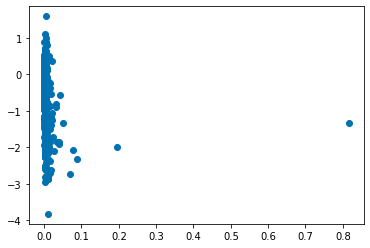

In [65]:
plt.scatter(df_manu['leverage'], y)

Después haber usado algebra matricial y graficar contra y, visualizamos que hay puntos extremos que es necesario eliminar si queremos hacer un modelo preciso. Con la función de describe obtenemos algunos datos estadísticos de leverage.

In [66]:
df_manu['leverage'].describe()

count    1.206000e+03
mean     4.145937e-03
std      2.461435e-02
min      2.148594e-07
25%      1.201533e-03
50%      2.894295e-03
75%      3.487125e-03
max      8.153106e-01
Name: leverage, dtype: float64

In [67]:
df_manu

,EPSP,OPM,Long_Financial_Leverage,Return,Small,Medium,leverage
firm,,,,,,,
A,0.008058,0.224612,0.264356,-0.213296,0,0,0.000717
AA,0.032291,0.235044,0.108019,0.217886,0,0,0.000207
AAOI,-0.155490,-0.272558,0.202891,-1.698276,1,0,0.002750
AAON,0.006162,0.125895,0.090598,-0.127718,0,0,0.000087
AAPL,0.008721,0.308179,0.294651,0.003943,0,0,0.000891
...,...,...,...,...,...,...,...
YTEN,-0.128398,-22.288591,0.146866,-1.332659,1,0,0.002578
ZBH,0.004833,0.119288,0.244538,-0.384678,0,0,0.000610
ZBRA,0.008971,0.148045,0.168869,-0.588505,0,0,0.000298


Vemos que que el valor máximo supera mucho de otros valores, tomamos en cuenta que es necesario eliminarlo para no afectar a gran escala nuestro modelo.

In [68]:
# Eliminar el dato extremo
# df_manu.drop(df_manu["leverage"].max(),axis=0, inplace=True)
df_manu.drop(df_manu['leverage'].idxmax(), inplace=True)

## Outliers

<AxesSubplot:>

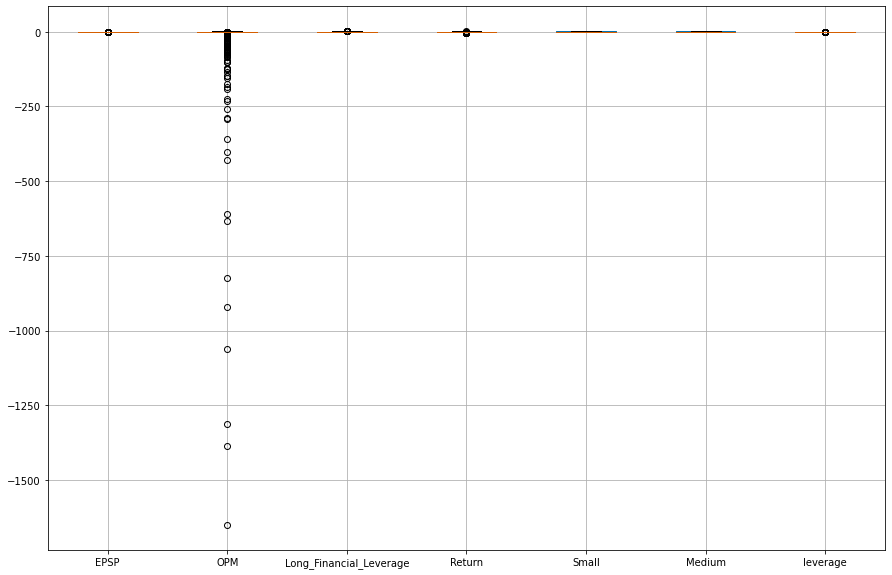

In [69]:
df_manu.boxplot(figsize=(15,10))

Con la gráfica de caja podemos ver que existe muchos datos outliers que rompe la tendencia de los datos en la columna de OPM

In [70]:
def outliers(ser1): 
    mean_value = ser1.mean()
    std_value = ser1.std()

    rule = (mean_value - 3 * std_value > ser1) | (ser1.mean() + 3 * ser1.std() < ser1)

    index = np.arange(ser1.shape[0])[rule]
    out = ser1.iloc[index]

    return out

In [71]:
arr = outliers(df_manu['OPM'])
arr

firm
ALLO   -1311.344262
CMRX   -1651.400000
CRMD    -920.948273
INO     -360.333305
LXRX    -631.891892
MIRO   -1062.776251
OGEN    -401.414029
RMED    -611.444444
TRVN    -823.000000
VTGN    -429.125942
WKHS   -1386.897342
Name: OPM, dtype: float64

In [72]:
arr.describe()

count      11.000000
mean     -871.870522
std       437.233557
min     -1651.400000
25%     -1187.060256
50%      -823.000000
75%      -520.285193
max      -360.333305
Name: OPM, dtype: float64

Al saber que la columna OPM contiene gran cantidad de outliers, usamos dicha columna como parametro para aplicar la función para detecer cuáles son los outliers que está rompiendo la tendencia y como resultado lo guardamos en un arreglo. Notamos que cuenta con grandes cantidades negativas alunas de las industrias, por lo tanto, estos datos lo podemos descartar para nuestro modelo.

In [73]:
indexDrop = df_manu[(df_manu['OPM'] < -360.333305)].index
df_manu.drop(indexDrop, inplace=True)

## Multicolinealidad

In [74]:
multi = np.linalg.inv(X.T @ X) @ (X.T @ y)

In [75]:
multi

array([ 2.81043351e+00,  1.69677343e-04, -3.09070040e-01, -6.53790276e-01,
       -3.78231298e-01])

## Regresión multiple

In [76]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20)

In [77]:
model1 = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print_model1 = model1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     146.7
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          1.29e-115
Time:                        10:28:49   Log-Likelihood:                -745.00
No. Observations:                 964   AIC:                             1502.
Df Residuals:                     958   BIC:                             1531.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [78]:
influence = model1.get_influence()

leverage = influence.hat_matrix_diag

sns.regplot(leverage, model1.resid_pearson,  fit_reg=False)
plt.title('Leverage')

NameError: name 'sns' is not defined

In [ ]:
def determinar_b(X, Y):

    return np.linalg.inv(X.T @ X) @ X.T @ Y

In [ ]:
b = determinar_b(X, y)

for i in range (len(b)):
    print("b{} = {:.3f}".format(i, b[i]))

Función de regresión multiple:
y = 2.810x1 - 0.309x3 - 0.654x4 - 0.378x5